Datasets Used

https://ec.europa.eu/eurostat/databrowser/view/ten00117/default/table?lang=en

### Electricity analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid') 
from pylab import rcParams  
import plotly.graph_objs as go
import cufflinks
from statsmodels.tsa.stattools import adfuller

In [2]:
def kwh_cost_graph(country, type_of_consumer):
    df= pd.read_csv('Electricity prices by type of user.csv')
    df = df[df['geo'] == country]
    df = df[df['indic_en'] == type_of_consumer]
    df.reset_index(inplace=True)
    df.drop(['index', 'DATAFLOW', 'LAST UPDATE', 'freq', 'product','indic_en', 'currency','unit', 'geo', 'OBS_FLAG'], inplace=True, axis=1)
    df.rename(columns = {'TIME_PERIOD':'time'}, inplace = True)
    df['time'].replace(regex=True,inplace=True, to_replace='M',value='')
    df.rename(columns = {'OBS_VALUE':'value'}, inplace = True)
    rcParams['figure.figsize'] = 20, 12
    df.plot(x = 'time', y = 'value')
    plt.xlabel('Date')
    plt.ylabel('EUR')
    plt.title("Price per KWH")

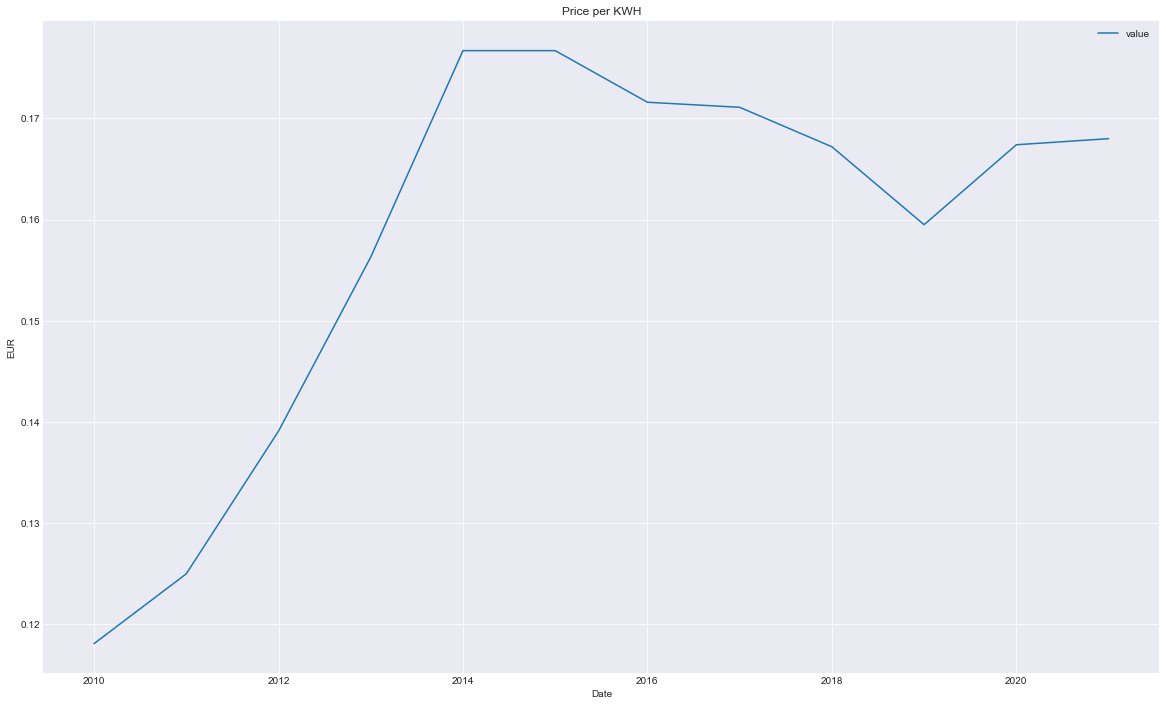

In [3]:
#MSHH stands for Medium size households
kwh_cost_graph('EL', 'MSHH')

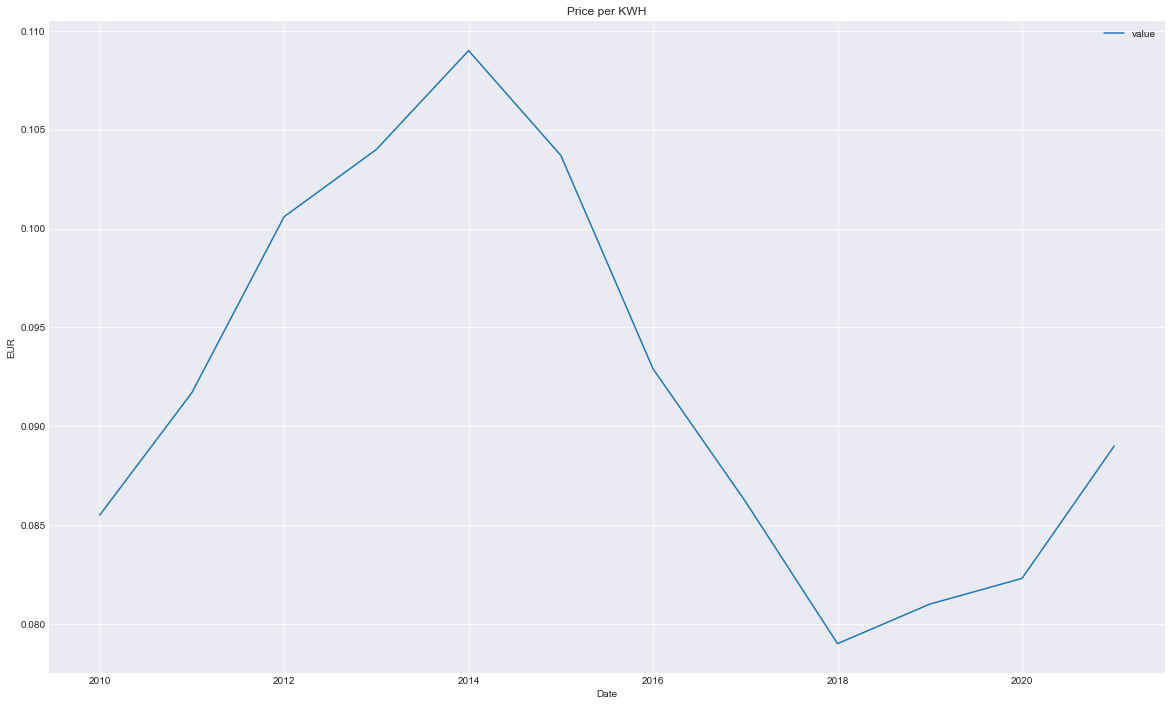

In [4]:
#MSIND stands for Non-household, medium size consumers
kwh_cost_graph('EL', 'MSIND')

### Natural Gas

In [5]:
df= pd.read_csv('natural gas - monthly prices.csv')
df

,Month,Price,Change
0,Oct 1998,1.60,-
1,Nov 1998,1.80,12.92%
2,Dec 1998,1.49,-17.60%
3,Jan 1999,1.60,7.88%
4,Feb 1999,1.58,-1.44%
...,...,...,...
281,Mar 2022,4.43,7.79%
282,Apr 2022,6.04,36.27%
283,May 2022,7.70,27.61%
284,Jun 2022,7.26,-5.76%


In [6]:
df['Date'] =  pd.to_datetime(df['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df

,Month,Price,Change,Date
0,Oct 1998,1.60,-,1998-10-01
1,Nov 1998,1.80,12.92%,1998-11-01
2,Dec 1998,1.49,-17.60%,1998-12-01
3,Jan 1999,1.60,7.88%,1999-01-01
4,Feb 1999,1.58,-1.44%,1999-02-01
...,...,...,...,...
281,Mar 2022,4.43,7.79%,2022-03-01
282,Apr 2022,6.04,36.27%,2022-04-01
283,May 2022,7.70,27.61%,2022-05-01
284,Jun 2022,7.26,-5.76%,2022-06-01


In [7]:
df.drop(['Month'], inplace=True, axis=1)
df

,Price,Change,Date
0,1.60,-,1998-10-01
1,1.80,12.92%,1998-11-01
2,1.49,-17.60%,1998-12-01
3,1.60,7.88%,1999-01-01
4,1.58,-1.44%,1999-02-01
...,...,...,...
281,4.43,7.79%,2022-03-01
282,6.04,36.27%,2022-04-01
283,7.70,27.61%,2022-05-01
284,7.26,-5.76%,2022-06-01


Text(0.5, 1.0, 'Euro per Million Metric British Thermal Unit')

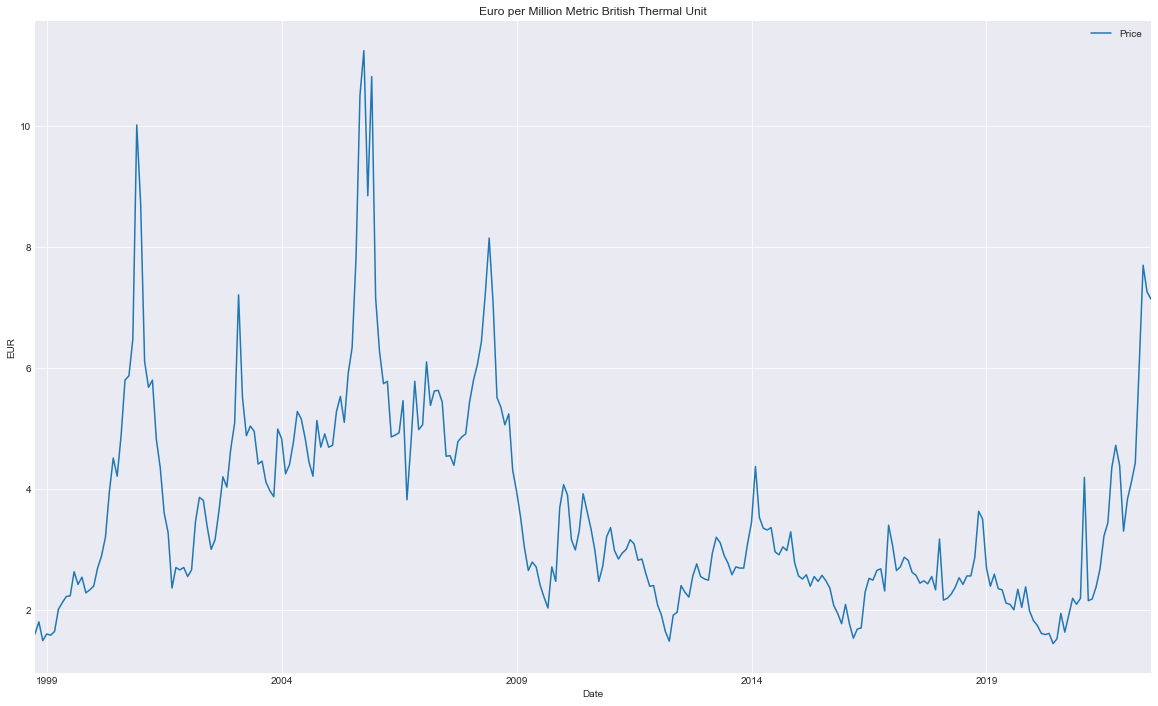

In [8]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Price')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.title("Euro per Million Metric British Thermal Unit")

In [9]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [10]:
df['Change'] = df['Change'].str.rstrip("%").astype(float)/100

Text(0.5, 1.0, 'Price change percentage through time')

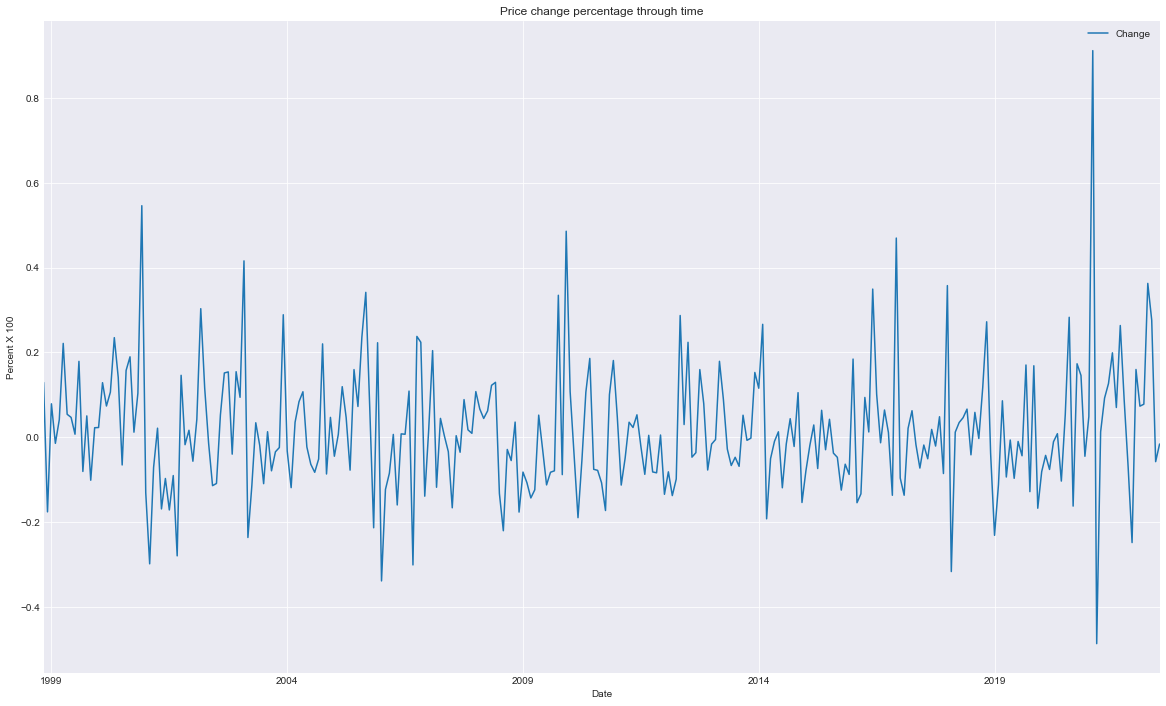

In [11]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Change')
plt.xlabel('Date')
plt.ylabel('Percent X 100')
plt.title("Price change percentage through time")

### Diesel

In [12]:
df= pd.read_csv('diesel price - monthly data.csv')
df

,Month,Price,Change
0,Jun 2006,1.65,-
1,Jul 2006,1.75,5.74%
2,Aug 2006,1.75,0.34%
3,Sep 2006,1.42,-18.92%
4,Oct 2006,1.42,0.03%
...,...,...,...
189,Mar 2022,3.43,35.47%
190,Apr 2022,3.74,8.90%
191,May 2022,4.40,17.67%
192,Jun 2022,4.13,-6.10%


In [13]:
df['Date'] =  pd.to_datetime(df['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df.drop(['Month'], inplace=True, axis=1)

Text(0.5, 1.0, 'Price per Gallon')

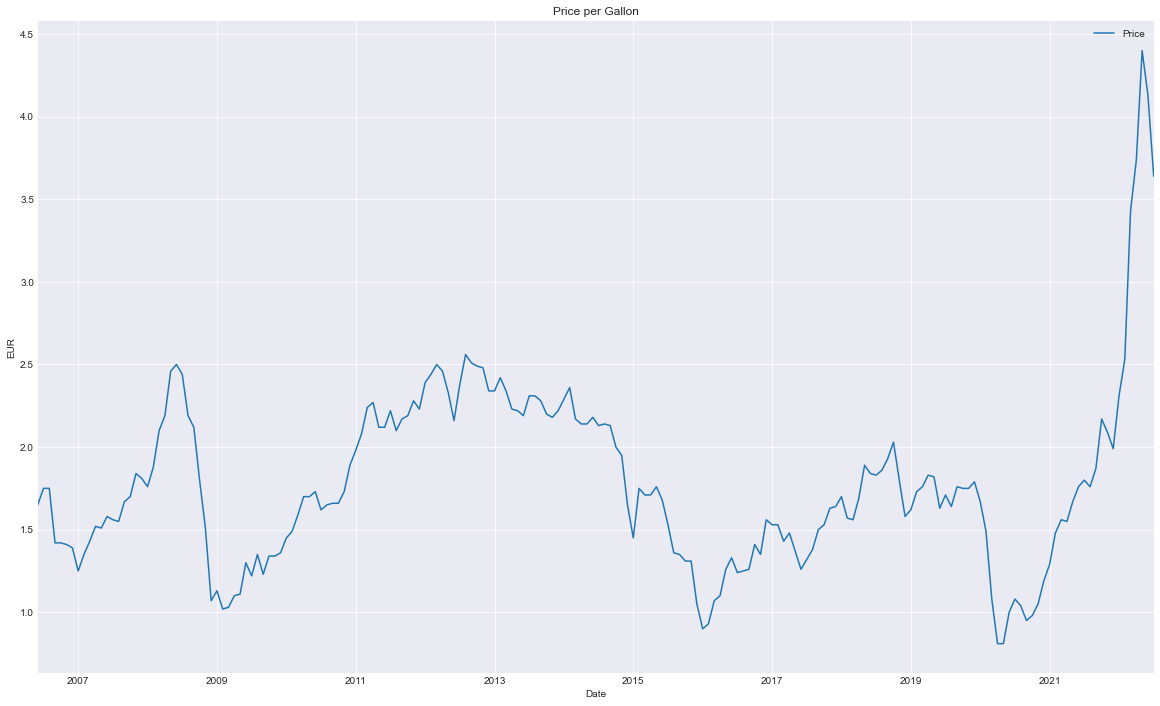

In [14]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Price')
plt.xlabel('Date')
plt.ylabel('EUR')
plt.title("Price per Gallon")

In [15]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [16]:
df['Change'] = df['Change'].str.rstrip("%").astype(float)

Text(0.5, 1.0, 'Price change percentage through time')

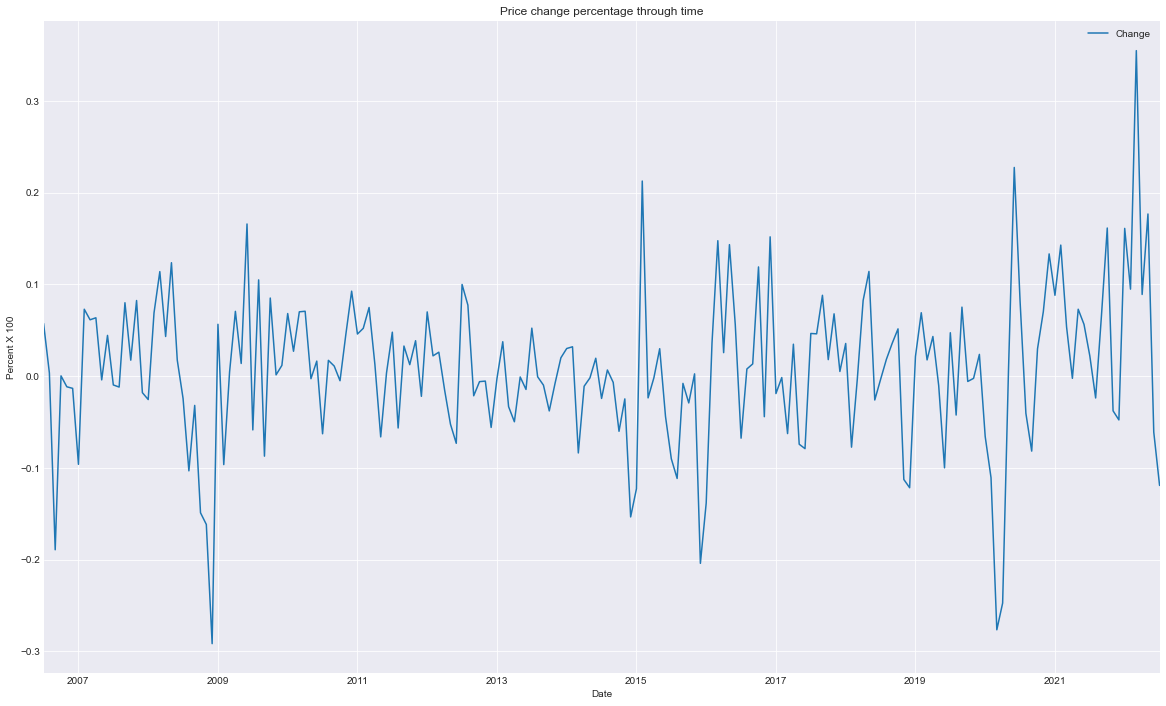

In [17]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Change')
plt.xlabel('Date')
plt.ylabel('Percent X 100')
plt.title("Price change percentage through time")

### Commodity Energy Price Index

In [18]:
df = pd.read_csv('Commodity Fuel (energy) Index Monthly Price.csv')
df

,Month,Price,Change
0,Aug 1992,27.00,-
1,Sep 1992,28.05,3.87%
2,Oct 1992,28.02,-0.08%
3,Nov 1992,26.40,-5.79%
4,Dec 1992,25.28,-4.23%
...,...,...,...
355,Mar 2022,163.19,24.31%
356,Apr 2022,153.19,-6.13%
357,May 2022,160.58,4.83%
358,Jun 2022,170.72,6.31%


In [19]:
df['Date'] =  pd.to_datetime(df['Month'], format='%Y%m', errors='ignore', infer_datetime_format=True)
df.drop(['Month'], inplace=True, axis=1)

Text(0.5, 1.0, 'Commodity Energy Index through time')

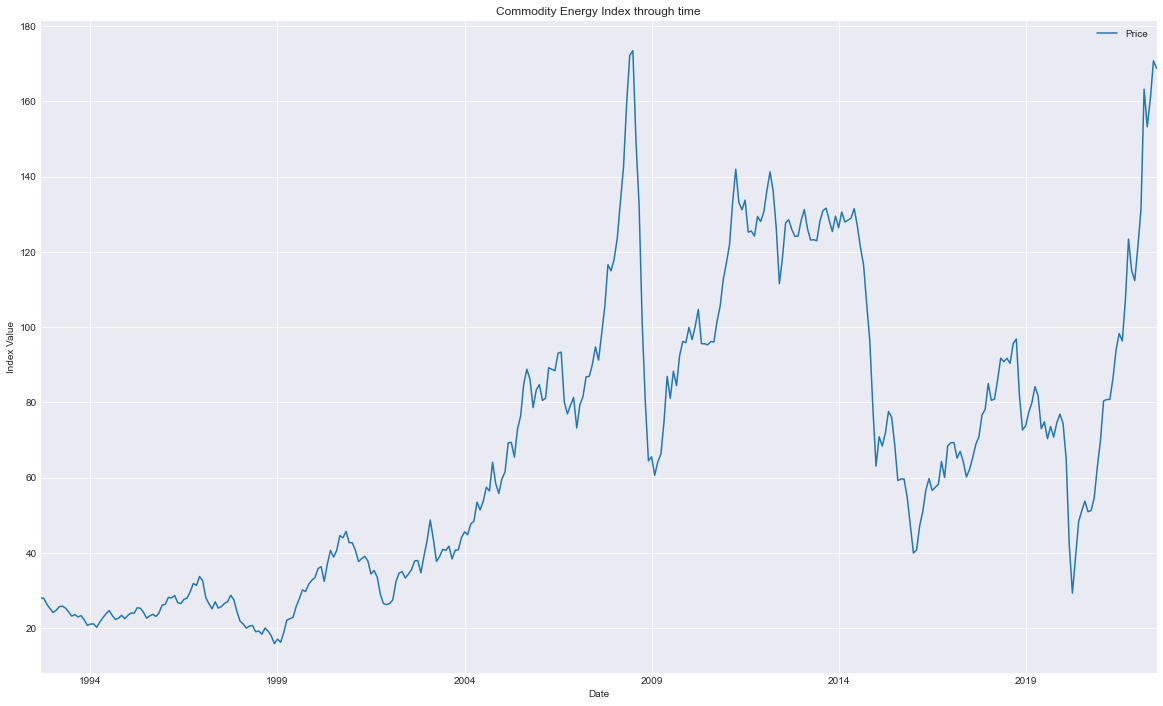

In [24]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Price')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title("Commodity Energy Index through time")

In [21]:
df.drop(index=df.index[0], axis=0, inplace=True)

In [22]:
df['Change'] = df['Change'].str.rstrip("%").astype(float)

Text(0.5, 1.0, 'Price change percentage through time')

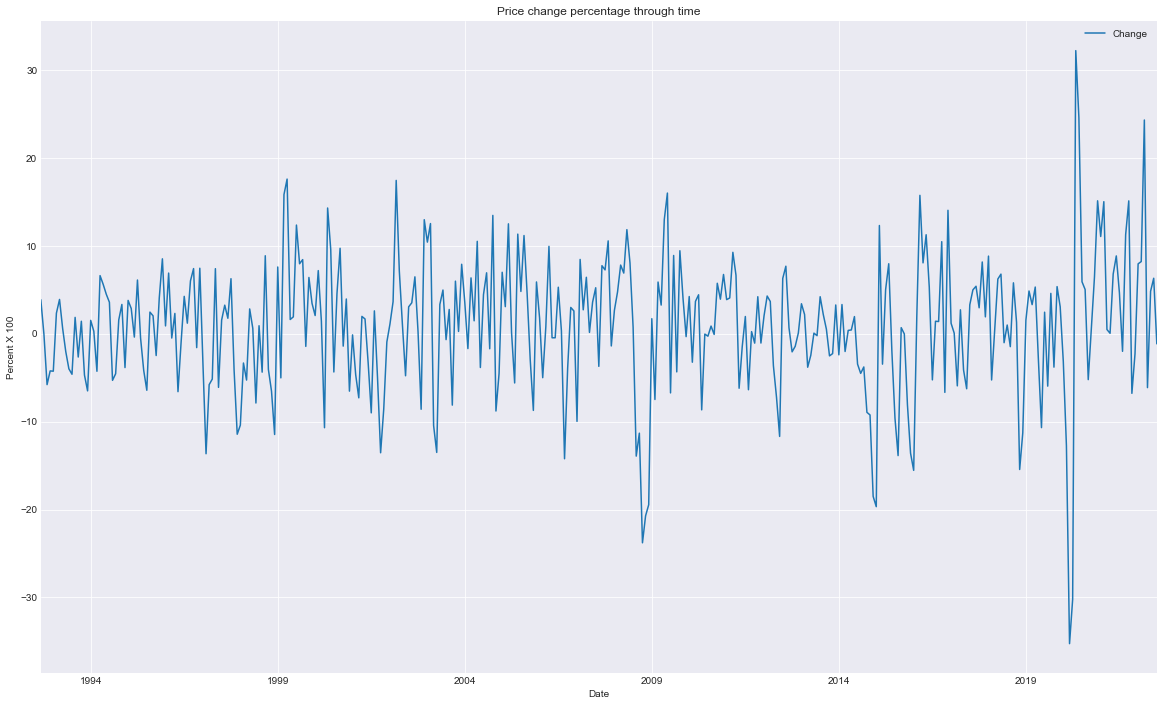

In [23]:
rcParams['figure.figsize'] = 20, 12
df.plot(x = 'Date', y = 'Change')
plt.xlabel('Date')
plt.ylabel('Percent X 100')
plt.title("Price change percentage through time")